### KB뱅킹앱 리뷰데이터 다루기

In [22]:
import json
import pandas as pd
with open("./data/com_kbstar_kbbank.json",'r',encoding='utf-8') as file:
    data=file.read()
data

'[\n    {\n        "사용자": "박성진 (홀리진)",\n        "별점": "4",\n        "리뷰": "리브와 리브넥스트에서 사용했던 ATM입금 기능이 있으면 좋겠습니다. 현금이나 실물 카드를 가지고 다니지 않게 되는 편리한 금융생활을 누릴 수 있었는데 리브넥스트의 종료로 더 이상 모바일에서는 ATM에서 현금 입금을 할 수 없게 됐습니다. 이 기능을 없애게 된 이유가 있나요? 출금 기능만 남았던데 입금 기능을 만들어주시면 좋겠습니다.",\n        "날짜": "2025년 3월 2일",\n        "개발자 응답": "고객님, 안녕하세요. 현재 KB스타뱅킹에서는 ATM입금 서비스를 제공하고 있지 않으나, 고객님께서 편리하게 이용하셨던 점이 충분히 이해되어 ATM입금 기능 도입 여부에 대해 검토해 보도록 하겠습니다. 다만, 새로운 서비스를 도입하기 위해서는 타행 시장조사, 요건 분석 및 개발 범위 등 검토되어야할 사항이 많아 다소 많은 시일이 소요될 수 있는 점 양해 부탁드립니다. 마지막으로 당행 자동화기기에서는 통장/카드없이 무통장 입금 서비스를 이용하실 수 있는 방법도 있으니 거래에 참고 부탁드리겠습니다.(*이용한도: 1회 50만원, 1일 100만원) 더욱 편리한 서비스를 제공하는 KB스타뱅킹이 되겠습니다. 감사합니다."\n    },\n    {\n        "사용자": "윤태경",\n        "별점": "5",\n        "리뷰": "KB스타뱅킹 입출금계좌를 가입한 후, 전반적으로 매우 만족스러운 경험을 했습니다. 가입 과정은 간편하고 빠르게 진행되었으며, 온라인으로 모든 절차를 처리할 수 있어 편리했습니다. 특히, 모바일 앱의 사용자 인터페이스가 직관적이어서 처음 사용하는 사람도 쉽게 이해할 수 있었습니다. 계좌 개설 후에는 다양한 금융 서비스가 제공되어 더욱 유용했습니다. 특히 실시간 거래 내역 확인과 간편한 송금 서비스가 매우 마음에 들었습니다. 또한, 다양한 금융 상품에 쉽게 접근할 수 있어 자산

In [3]:
data[:100]

'[\n    {\n        "사용자": "박성진 (홀리진)",\n        "별점": "4",\n        "리뷰": "리브와 리브넥스트에서 사용했던 ATM입금 기능이 있으면'

In [23]:
reviews=json.loads(data)
len(reviews)

2223

In [7]:
reviews[0]

{'사용자': '박성진 (홀리진)',
 '별점': '4',
 '리뷰': '리브와 리브넥스트에서 사용했던 ATM입금 기능이 있으면 좋겠습니다. 현금이나 실물 카드를 가지고 다니지 않게 되는 편리한 금융생활을 누릴 수 있었는데 리브넥스트의 종료로 더 이상 모바일에서는 ATM에서 현금 입금을 할 수 없게 됐습니다. 이 기능을 없애게 된 이유가 있나요? 출금 기능만 남았던데 입금 기능을 만들어주시면 좋겠습니다.',
 '날짜': '2025년 3월 2일',
 '개발자 응답': '고객님, 안녕하세요. 현재 KB스타뱅킹에서는 ATM입금 서비스를 제공하고 있지 않으나, 고객님께서 편리하게 이용하셨던 점이 충분히 이해되어 ATM입금 기능 도입 여부에 대해 검토해 보도록 하겠습니다. 다만, 새로운 서비스를 도입하기 위해서는 타행 시장조사, 요건 분석 및 개발 범위 등 검토되어야할 사항이 많아 다소 많은 시일이 소요될 수 있는 점 양해 부탁드립니다. 마지막으로 당행 자동화기기에서는 통장/카드없이 무통장 입금 서비스를 이용하실 수 있는 방법도 있으니 거래에 참고 부탁드리겠습니다.(*이용한도: 1회 50만원, 1일 100만원) 더욱 편리한 서비스를 제공하는 KB스타뱅킹이 되겠습니다. 감사합니다.'}

- 클리닝: 문자열함수로 특수문자 제거 strip.replace로 제거하는건 나중에해도됨.
- 

In [24]:
# 여기서 키만 먼저 뽑아내기
list(reviews[0].keys())

['사용자', '별점', '리뷰', '날짜', '개발자 응답']

In [32]:
for key in reviews[0]: #이렇게도 뽑을 수 있음.
    print(key)

사용자
별점
리뷰
날짜
개발자 응답


In [32]:
for key in reviews[0]: #이렇게도 뽑을 수 있음. 쌤풀
    for review in reviews[:2]: #[:2]이런식으로 소량확인추천
        print(review[key])

사용자
별점
리뷰
날짜
개발자 응답


In [34]:
for key in reviews[0]:  #쌤풀
    temp=[]
    for review in reviews[:2]: #나오는 개수가 여기서 조절됨.
        temp.append(review[key])
    result[key]=temp
result['별점']

['4', '5']

In [34]:
for key in reviews[0]:  #쌤풀
    temp=[]
    for review in reviews[:2]: #나오는 개수가 여기서 조절됨.
        temp.append(review[key])
    result[key]=temp
print result['별점']

['4', '5']

In [36]:
for key in reviews[0]:  #쌤풀
    temp=[]
    for review in reviews[:]: 
        temp.append(review[key])
    result[key]=temp
result['별점']

['4',
 '5',
 '1',
 '5',
 '1',
 '1',
 '3',
 '3',
 '5',
 '5',
 '1',
 '1',
 '1',
 '1',
 '5',
 '1',
 '5',
 '5',
 '4',
 '5',
 '1',
 '5',
 '1',
 '1',
 '3',
 '3',
 '5',
 '5',
 '1',
 '1',
 '1',
 '1',
 '5',
 '1',
 '5',
 '5',
 '4',
 '5',
 '1',
 '5',
 '1',
 '1',
 '3',
 '3',
 '5',
 '5',
 '1',
 '1',
 '1',
 '1',
 '5',
 '1',
 '5',
 '5',
 '4',
 '5',
 '1',
 '5',
 '1',
 '1',
 '3',
 '3',
 '5',
 '5',
 '1',
 '1',
 '1',
 '1',
 '5',
 '1',
 '5',
 '5',
 '4',
 '5',
 '1',
 '5',
 '1',
 '1',
 '3',
 '3',
 '5',
 '5',
 '1',
 '1',
 '1',
 '1',
 '5',
 '1',
 '5',
 '5',
 '4',
 '5',
 '1',
 '5',
 '1',
 '1',
 '3',
 '3',
 '5',
 '5',
 '1',
 '1',
 '1',
 '1',
 '5',
 '1',
 '5',
 '5',
 '4',
 '5',
 '1',
 '5',
 '1',
 '1',
 '3',
 '3',
 '5',
 '5',
 '1',
 '1',
 '1',
 '1',
 '5',
 '1',
 '5',
 '5',
 '1',
 '1',
 '3',
 '2',
 '1',
 '1',
 '1',
 '1',
 '2',
 '5',
 '1',
 '1',
 '1',
 '4',
 '1',
 '1',
 '5',
 '1',
 '1',
 '1',
 '4',
 '5',
 '1',
 '5',
 '1',
 '1',
 '3',
 '3',
 '5',
 '5',
 '1',
 '1',
 '1',
 '1',
 '5',
 '1',
 '5',
 '5',
 '1',
 '1',
 '3'

In [37]:
df=pd.DataFrame(result)
df

사용자 별점                                                 리뷰  \
0           박성진 (홀리진)  4  리브와 리브넥스트에서 사용했던 ATM입금 기능이 있으면 좋겠습니다. 현금이나 실물 ...   
1                 윤태경  5  KB스타뱅킹 입출금계좌를 가입한 후, 전반적으로 매우 만족스러운 경험을 했습니다. ...   
2             tae tae  1  타 은행대비 증명서발급이 매우 불편하고 제한적임. 그리고 메뉴이동도 불편함. 뒤로가...   
3                정다우니  5  설치 후 통장 개설 시 오류로 인해 종료가 됐었습니다. 하나하나 집중해서 잘했는데 ...   
4                 우간능  1  왜 자꾸 앱 전용키보드를 쓸때 두개가 같이 눌리나요 그거땜에 로그인도 못하고 제대로...   
...               ... ..                                                ...   
2218              김하늘  5        평일 근무시간에 사진인증이 잘되는편 같습니다 업무시간 이외에도 잘되면 좋겠네요   
2219          밝고긍정적인거  1  아니이봐요지금 타금융기관어플은 다되는데 이것만안된다고요 이것만.네트워크문제였었으면 ...   
2220              정현우  5                       안내가 정확해서 따라가면 다 되어서 너무 편리합니다   
2221               임겸  5                    어플 UI가 알아보기 쉽고 사용하기 너무 편리해서 좋아요   
2222  Changwan “-” Yu  1  어플 문제 때문에 월세도 못 내게 생겼습니다. 와이파이가 매우 잘 작동하는 상황에서...   

                 날짜                                             개발자 응답  
0       2025년 3월 2일  고객님, 안녕하세요. 현재 KB스타뱅킹에서는 ATM입금 서비스를 제공하고 있지 않으...  
1      2025년 1월 20일  고객님 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. KB스타뱅킹...  
2      2025년 1월 14일  안녕하세요 고객님. KB스타뱅킹 이용에 불편을 드려 죄송합니다. 고객님의 의견을 증...  
3      2025년 1월 25일  고객님 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. KB스타뱅킹...  
4       2025년 2월 1일  고객님 안녕하세요. KB스타뱅킹 이용에 불편을 드려 진심으로 죄송합니다. 사용자암호...  
...             ...                                                ...  
2218   2025년 3월 11일  고객님 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. KB스타뱅킹...  
2219  2024년 12월 26일  안녕하세요. KB스타뱅킹 이용에 불편을 드려 죄송합니다. 앱 구동이 원활하지 않을 ...  
2220   2025년 3월 11일  고객님 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. KB스타뱅킹...  
2221    2025년 3월 3일  고객님 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. KB스타뱅킹...  
2222  2023년 10월 12일  고객님, 안녕하세요! KB스타뱅킹 이용에 불편을 드려 대단히 죄송합니다. 앱 이용 ...  

[2223 rows x 5 columns]

In [44]:
#df.info

In [46]:
# 쌤풀. 클리닝: 특수문자 제거, int(별점)
result={}
for key in reviews[0]:  #쌤풀
    temp=[]
    for review in reviews[:]: 
        if key=='별점':
            temp.append(int(review[key]))
        else:
            temp2=str(review[key]).replace('!',' ').replace(',','').replace('..',' ')
            temp.append(temp2)
        
        temp.append(review[key])
    result[key]=temp
result['별점']

df=pd.DataFrame(result)
df

사용자 별점                                                 리뷰  \
0           박성진 (홀리진)  4  리브와 리브넥스트에서 사용했던 ATM입금 기능이 있으면 좋겠습니다. 현금이나 실물 ...   
1           박성진 (홀리진)  4  리브와 리브넥스트에서 사용했던 ATM입금 기능이 있으면 좋겠습니다. 현금이나 실물 ...   
2                 윤태경  5  KB스타뱅킹 입출금계좌를 가입한 후 전반적으로 매우 만족스러운 경험을 했습니다. 가...   
3                 윤태경  5  KB스타뱅킹 입출금계좌를 가입한 후, 전반적으로 매우 만족스러운 경험을 했습니다. ...   
4             tae tae  1  타 은행대비 증명서발급이 매우 불편하고 제한적임. 그리고 메뉴이동도 불편함. 뒤로가...   
...               ... ..                                                ...   
4441              정현우  5                       안내가 정확해서 따라가면 다 되어서 너무 편리합니다   
4442               임겸  5                    어플 UI가 알아보기 쉽고 사용하기 너무 편리해서 좋아요   
4443               임겸  5                    어플 UI가 알아보기 쉽고 사용하기 너무 편리해서 좋아요   
4444  Changwan “-” Yu  1  어플 문제 때문에 월세도 못 내게 생겼습니다. 와이파이가 매우 잘 작동하는 상황에서...   
4445  Changwan “-” Yu  1  어플 문제 때문에 월세도 못 내게 생겼습니다. 와이파이가 매우 잘 작동하는 상황에서...   

                 날짜                                             개발자 응답  
0       2025년 3월 2일  고객님 안녕하세요. 현재 KB스타뱅킹에서는 ATM입금 서비스를 제공하고 있지 않으나...  
1       2025년 3월 2일  고객님, 안녕하세요. 현재 KB스타뱅킹에서는 ATM입금 서비스를 제공하고 있지 않으...  
2      2025년 1월 20일  고객님 안녕하세요  KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. KB스타뱅킹...  
3      2025년 1월 20일  고객님 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. KB스타뱅킹...  
4      2025년 1월 14일  안녕하세요 고객님. KB스타뱅킹 이용에 불편을 드려 죄송합니다. 고객님의 의견을 증...  
...             ...                                                ...  
4441   2025년 3월 11일  고객님 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. KB스타뱅킹...  
4442    2025년 3월 3일  고객님 안녕하세요  KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. KB스타뱅킹...  
4443    2025년 3월 3일  고객님 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. KB스타뱅킹...  
4444  2023년 10월 12일  고객님 안녕하세요  KB스타뱅킹 이용에 불편을 드려 대단히 죄송합니다. 앱 이용 시...  
4445  2023년 10월 12일  고객님, 안녕하세요! KB스타뱅킹 이용에 불편을 드려 대단히 죄송합니다. 앱 이용 ...  

[4446 rows x 5 columns]

In [46]:
# 쌤풀. 클리닝: 특수문자 제거, int(별점)
result={}
for key in reviews[0]:  #쌤풀
    temp=[]
    for review in reviews[:]: 
        if key=='별점':
            temp.append(int(review[key]))
        else:
            temp2=str(review[key]).replace('!',' ').replace(',','').replace('..',' ')
            temp.append(temp2)
        
        temp.append(review[key])
    result[key]=temp
result['별점']

df=pd.DataFrame(result)
df

사용자 별점                                                 리뷰  \
0           박성진 (홀리진)  4  리브와 리브넥스트에서 사용했던 ATM입금 기능이 있으면 좋겠습니다. 현금이나 실물 ...   
1           박성진 (홀리진)  4  리브와 리브넥스트에서 사용했던 ATM입금 기능이 있으면 좋겠습니다. 현금이나 실물 ...   
2                 윤태경  5  KB스타뱅킹 입출금계좌를 가입한 후 전반적으로 매우 만족스러운 경험을 했습니다. 가...   
3                 윤태경  5  KB스타뱅킹 입출금계좌를 가입한 후, 전반적으로 매우 만족스러운 경험을 했습니다. ...   
4             tae tae  1  타 은행대비 증명서발급이 매우 불편하고 제한적임. 그리고 메뉴이동도 불편함. 뒤로가...   
...               ... ..                                                ...   
4441              정현우  5                       안내가 정확해서 따라가면 다 되어서 너무 편리합니다   
4442               임겸  5                    어플 UI가 알아보기 쉽고 사용하기 너무 편리해서 좋아요   
4443               임겸  5                    어플 UI가 알아보기 쉽고 사용하기 너무 편리해서 좋아요   
4444  Changwan “-” Yu  1  어플 문제 때문에 월세도 못 내게 생겼습니다. 와이파이가 매우 잘 작동하는 상황에서...   
4445  Changwan “-” Yu  1  어플 문제 때문에 월세도 못 내게 생겼습니다. 와이파이가 매우 잘 작동하는 상황에서...   

                 날짜                                             개발자 응답  
0       2025년 3월 2일  고객님 안녕하세요. 현재 KB스타뱅킹에서는 ATM입금 서비스를 제공하고 있지 않으나...  
1       2025년 3월 2일  고객님, 안녕하세요. 현재 KB스타뱅킹에서는 ATM입금 서비스를 제공하고 있지 않으...  
2      2025년 1월 20일  고객님 안녕하세요  KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. KB스타뱅킹...  
3      2025년 1월 20일  고객님 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. KB스타뱅킹...  
4      2025년 1월 14일  안녕하세요 고객님. KB스타뱅킹 이용에 불편을 드려 죄송합니다. 고객님의 의견을 증...  
...             ...                                                ...  
4441   2025년 3월 11일  고객님 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. KB스타뱅킹...  
4442    2025년 3월 3일  고객님 안녕하세요  KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. KB스타뱅킹...  
4443    2025년 3월 3일  고객님 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. KB스타뱅킹...  
4444  2023년 10월 12일  고객님 안녕하세요  KB스타뱅킹 이용에 불편을 드려 대단히 죄송합니다. 앱 이용 시...  
4445  2023년 10월 12일  고객님, 안녕하세요! KB스타뱅킹 이용에 불편을 드려 대단히 죄송합니다. 앱 이용 ...  

[4446 rows x 5 columns]

####re.sub 써서 삭제해보기

In [90]:
import re

In [94]:
# 쌤풀. 클리닝: 특수문자 제거, int(별점)
result={}
for key in reviews[0]:  #쌤풀
    temp=[]
    for review in reviews[:]: 
        if key=='별점':
            temp.append(int(review[key]))
        else:
            # temp2=str(review[key]).replace('!',' ').replace(',','').replace('..',' ')
            re.sub(r'[^가-힣a-zA-Z0-9]'',' ',str(review[key])
            #temp.append(temp2)
        
        temp.append(review[key])
    result[key]=temp
result['별점']

df=pd.DataFrame(result)
df

SyntaxError: EOL while scanning string literal (508829295.py, line 10)

In [56]:
result11={} # 내가 시도한.. 실패~
for review in reviews:
    for key, value in review.items():
        result11.setdefault(key,[]).append(value)

        result11_df=pd.DataFrame(result11)
result11_df

AttributeError: 'str' object has no attribute 'items'

### 내풀이

In [10]:
reviews[0]['사용자']

'박성진 (홀리진)'

In [25]:
for key in reviews[0]:
    print(reviews[0][key])

박성진 (홀리진)
4
리브와 리브넥스트에서 사용했던 ATM입금 기능이 있으면 좋겠습니다. 현금이나 실물 카드를 가지고 다니지 않게 되는 편리한 금융생활을 누릴 수 있었는데 리브넥스트의 종료로 더 이상 모바일에서는 ATM에서 현금 입금을 할 수 없게 됐습니다. 이 기능을 없애게 된 이유가 있나요? 출금 기능만 남았던데 입금 기능을 만들어주시면 좋겠습니다.
2025년 3월 2일
고객님, 안녕하세요. 현재 KB스타뱅킹에서는 ATM입금 서비스를 제공하고 있지 않으나, 고객님께서 편리하게 이용하셨던 점이 충분히 이해되어 ATM입금 기능 도입 여부에 대해 검토해 보도록 하겠습니다. 다만, 새로운 서비스를 도입하기 위해서는 타행 시장조사, 요건 분석 및 개발 범위 등 검토되어야할 사항이 많아 다소 많은 시일이 소요될 수 있는 점 양해 부탁드립니다. 마지막으로 당행 자동화기기에서는 통장/카드없이 무통장 입금 서비스를 이용하실 수 있는 방법도 있으니 거래에 참고 부탁드리겠습니다.(*이용한도: 1회 50만원, 1일 100만원) 더욱 편리한 서비스를 제공하는 KB스타뱅킹이 되겠습니다. 감사합니다.


In [26]:
us=[]
sc=[]
re=[]
da=[]
de=[]

In [31]:
result={}
for key in reviews[0]:
    temp=[]
    for item in reviews[:]:
        temp.append(item[key])
    #print(dictt)
    result[key]=temp
    #print(temp)
result

{'사용자': ['박성진 (홀리진)',
  '윤태경',
  'tae tae',
  '정다우니',
  '우간능',
  '꾸꾸잉꾸',
  '이이민우',
  '김수진',
  '김영옥',
  '이욱',
  '김두영',
  '훈',
  '위윌왁휴',
  '김숏',
  'Sean Moon',
  'sprirea KTH',
  '깔린느',
  '김유리',
  '박성진 (홀리진)',
  '윤태경',
  'tae tae',
  '정다우니',
  '우간능',
  '꾸꾸잉꾸',
  '이이민우',
  '김수진',
  '김영옥',
  '이욱',
  '김두영',
  '훈',
  '위윌왁휴',
  '김숏',
  'Sean Moon',
  'sprirea KTH',
  '깔린느',
  '김유리',
  '박성진 (홀리진)',
  '윤태경',
  'tae tae',
  '정다우니',
  '우간능',
  '꾸꾸잉꾸',
  '이이민우',
  '김수진',
  '김영옥',
  '이욱',
  '김두영',
  '훈',
  '위윌왁휴',
  '김숏',
  'Sean Moon',
  'sprirea KTH',
  '깔린느',
  '김유리',
  '박성진 (홀리진)',
  '윤태경',
  'tae tae',
  '정다우니',
  '우간능',
  '꾸꾸잉꾸',
  '이이민우',
  '김수진',
  '김영옥',
  '이욱',
  '김두영',
  '훈',
  '위윌왁휴',
  '김숏',
  'Sean Moon',
  'sprirea KTH',
  '깔린느',
  '김유리',
  '박성진 (홀리진)',
  '윤태경',
  'tae tae',
  '정다우니',
  '우간능',
  '꾸꾸잉꾸',
  '이이민우',
  '김수진',
  '김영옥',
  '이욱',
  '김두영',
  '훈',
  '위윌왁휴',
  '김숏',
  'Sean Moon',
  'sprirea KTH',
  '깔린느',
  '김유리',
  '박성진 (홀리진)',
  '윤태경',
  'tae tae',
  '정다우니',
  '우간능',
  '꾸꾸잉꾸

In [17]:
 #for dictt in reviews:
#     User=dictt['사용자']
#     Score=dictt['별점']
    
#     us.append(User)
#     sc.append(Score)
    
#     print(us)
#     print(sc)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## 예제3) 요식업관련데이터 변환하기

In [65]:
#내풀이,
import json
import pandas as pd
with open('./data/전국치킨집리스트.json','r',encoding='utf-8') as a:
    b=a.read()
print(b[:10])

[{"header"


In [76]:
import json
c = json.loads(b)
c[0]


{'header': {'description': '소상공인시장진흥공단 주요상권내 상가업소정보',
  'columns': ['상가업소번호',
   '상호명',
   '지점명',
   '상권업종대분류코드',
   '상권업종대분류명',
   '상권업종중분류코드',
   '상권업종중분류명',
   '상권업종소분류코드',
   '상권업종소분류명',
   '표준산업분류코드',
   '표준산업분류명',
   '시도코드',
   '시도명',
   '시군구코드',
   '시군구명',
   '행정동코드',
   '행정동명',
   '법정동코드',
   '법정동명',
   'PNU코드',
   '대지구분코드',
   '대지구분명',
   '지번본번지',
   '지번부번지',
   '지번주소',
   '도로명코드',
   '도로명',
   '건물본번지',
   '건물부번지',
   '건물관리번호',
   '건물명',
   '도로명주소',
   '구우편번호',
   '신우편번호',
   '동정보',
   '층정보',
   '호정보',
   '경도',
   '위도'],
  'stdrYm': '202206',
  'resultCode': '00',
  'resultMsg': 'NORMAL SERVICE'},
 'body': {'items': [{'bizesId': '10027626',
    'bizesNm': '장모님치킨가창점',
    'brchNm': '가창점',
    'indsLclsCd': 'Q',
    'indsLclsNm': '음식',
    'indsMclsCd': 'Q05',
    'indsMclsNm': '닭/오리요리',
    'indsSclsCd': 'Q05A08',
    'indsSclsNm': '후라이드/양념치킨',
    'ksicCd': 'I56193',
    'ksicNm': '치킨 전문점',
    'ctprvnCd': '27',
    'ctprvnNm': '대구광역시',
    'signguCd': '27710',
    'signguNm':

In [72]:
print(list(c[0]['header'].keys()))
print(list(c[0]['body'].keys()),end='\n')

['description', 'columns', 'stdrYm', 'resultCode', 'resultMsg']
['items', 'numOfRows', 'pageNo', 'totalCount']


In [84]:
c[0]['body']['items']

'소상공인시장진흥공단 주요상권내 상가업소정보'

In [95]:
e={}
for d in c[0]['body']:
    for key, value in c[0]['body']['items']:
        #print(f)
        e.setdefault(key,[]).append(value)
        print(e)

ValueError: too many values to unpack (expected 2)

## 풀이 전 단계
- c에는 리스트가 37개
- 리스트 1개에는 1000개의 가게정보(딕셔너리)가짐
- 가게정보의 위치는 c[0]['body']['items']임.
- items는 이 딕셔너리들을 리스트로서 갖고있음

In [114]:
c[0]['body']['items'][:2][0]

{'bizesId': '10027626',
 'bizesNm': '장모님치킨가창점',
 'brchNm': '가창점',
 'indsLclsCd': 'Q',
 'indsLclsNm': '음식',
 'indsMclsCd': 'Q05',
 'indsMclsNm': '닭/오리요리',
 'indsSclsCd': 'Q05A08',
 'indsSclsNm': '후라이드/양념치킨',
 'ksicCd': 'I56193',
 'ksicNm': '치킨 전문점',
 'ctprvnCd': '27',
 'ctprvnNm': '대구광역시',
 'signguCd': '27710',
 'signguNm': '달성군',
 'adongCd': '2771031000',
 'adongNm': '가창면',
 'ldongCd': '2771031024',
 'ldongNm': '가창면',
 'lnoCd': '2771031024101200001',
 'plotSctCd': '1',
 'plotSctNm': '대지',
 'lnoMnno': 120,
 'lnoSlno': 1,
 'lnoAdr': '대구광역시 달성군 가창면 냉천리 120-1',
 'rdnmCd': '277103148001',
 'rdnm': '대구광역시 달성군 가창면 가창동로',
 'bldMnno': 6,
 'bldSlno': '',
 'bldMngNo': '2771031024101200004036858',
 'bldNm': '',
 'rdnmAdr': '대구광역시 달성군 가창면 가창동로 6',
 'oldZipcd': '711861',
 'newZipcd': '42938',
 'dongNo': '',
 'flrNo': '1',
 'hoNo': '',
 'lon': 128.644458591419,
 'lat': 35.7826625402814}

In [97]:
len(c[0]['body']['items'])  #1천개의 딕셔너리들을 가진 리스트임.

1000

In [98]:
len(c[0]['body']['items'][0])  #39개의 키값쌍가진 딕셔너리임. 키도 39개

39

#### 최소단위의 딕셔너리를 찾았으니 반복문에 집어넣으면 모을 수 있다.

In [119]:
for d in c[0]['body']['items'][:2]: #다른 변수에 넣지않고그대로 사용
    print(d)

{'bizesId': '10027626', 'bizesNm': '장모님치킨가창점', 'brchNm': '가창점', 'indsLclsCd': 'Q', 'indsLclsNm': '음식', 'indsMclsCd': 'Q05', 'indsMclsNm': '닭/오리요리', 'indsSclsCd': 'Q05A08', 'indsSclsNm': '후라이드/양념치킨', 'ksicCd': 'I56193', 'ksicNm': '치킨 전문점', 'ctprvnCd': '27', 'ctprvnNm': '대구광역시', 'signguCd': '27710', 'signguNm': '달성군', 'adongCd': '2771031000', 'adongNm': '가창면', 'ldongCd': '2771031024', 'ldongNm': '가창면', 'lnoCd': '2771031024101200001', 'plotSctCd': '1', 'plotSctNm': '대지', 'lnoMnno': 120, 'lnoSlno': 1, 'lnoAdr': '대구광역시 달성군 가창면 냉천리 120-1', 'rdnmCd': '277103148001', 'rdnm': '대구광역시 달성군 가창면 가창동로', 'bldMnno': 6, 'bldSlno': '', 'bldMngNo': '2771031024101200004036858', 'bldNm': '', 'rdnmAdr': '대구광역시 달성군 가창면 가창동로 6', 'oldZipcd': '711861', 'newZipcd': '42938', 'dongNo': '', 'flrNo': '1', 'hoNo': '', 'lon': 128.644458591419, 'lat': 35.7826625402814}
{'bizesId': '10098244', 'bizesNm': '짱구피자치킨', 'brchNm': '', 'indsLclsCd': 'Q', 'indsLclsNm': '음식', 'indsMclsCd': 'Q05', 'indsMclsNm': '닭/오리요리', 'indsSclsC

In [120]:
for d in c[0]['body']['items'][:2]:
    for key, value in d.items():
        print(key, value)
        #f.setdefault(key,[]).
        

bizesId 10027626
bizesNm 장모님치킨가창점
brchNm 가창점
indsLclsCd Q
indsLclsNm 음식
indsMclsCd Q05
indsMclsNm 닭/오리요리
indsSclsCd Q05A08
indsSclsNm 후라이드/양념치킨
ksicCd I56193
ksicNm 치킨 전문점
ctprvnCd 27
ctprvnNm 대구광역시
signguCd 27710
signguNm 달성군
adongCd 2771031000
adongNm 가창면
ldongCd 2771031024
ldongNm 가창면
lnoCd 2771031024101200001
plotSctCd 1
plotSctNm 대지
lnoMnno 120
lnoSlno 1
lnoAdr 대구광역시 달성군 가창면 냉천리 120-1
rdnmCd 277103148001
rdnm 대구광역시 달성군 가창면 가창동로
bldMnno 6
bldSlno 
bldMngNo 2771031024101200004036858
bldNm 
rdnmAdr 대구광역시 달성군 가창면 가창동로 6
oldZipcd 711861
newZipcd 42938
dongNo 
flrNo 1
hoNo 
lon 128.644458591419
lat 35.7826625402814
bizesId 10098244
bizesNm 짱구피자치킨
brchNm 
indsLclsCd Q
indsLclsNm 음식
indsMclsCd Q05
indsMclsNm 닭/오리요리
indsSclsCd Q05A08
indsSclsNm 후라이드/양념치킨
ksicCd I56193
ksicNm 치킨 전문점
ctprvnCd 41
ctprvnNm 경기도
signguCd 41250
signguNm 동두천시
adongCd 4125056500
adongNm 불현동
ldongCd 4125010300
ldongNm 생연동
lnoCd 4125010300102680011
plotSctCd 1
plotSctNm 대지
lnoMnno 268
lnoSlno 11
lnoAdr 경기도 동두천시 생연동 2

In [124]:
e={}
for d in c[0]['body']['items'][:2]:
    for key, value in d.items():
        e.setdefault(key,[]).append(value)
e

{'bizesId': ['10027626', '10098244', '10099459', '10136167'],
 'bizesNm': ['장모님치킨가창점', '짱구피자치킨', '쭈노치킨', '치킨뱅이'],
 'brchNm': ['가창점', '', '', ''],
 'indsLclsCd': ['Q', 'Q', 'Q', 'Q'],
 'indsLclsNm': ['음식', '음식', '음식', '음식'],
 'indsMclsCd': ['Q05', 'Q05', 'Q05', 'Q05'],
 'indsMclsNm': ['닭/오리요리', '닭/오리요리', '닭/오리요리', '닭/오리요리'],
 'indsSclsCd': ['Q05A08', 'Q05A08', 'Q05A08', 'Q05A08'],
 'indsSclsNm': ['후라이드/양념치킨', '후라이드/양념치킨', '후라이드/양념치킨', '후라이드/양념치킨'],
 'ksicCd': ['I56193', 'I56193', 'I56193', 'I56193'],
 'ksicNm': ['치킨 전문점', '치킨 전문점', '치킨 전문점', '치킨 전문점'],
 'ctprvnCd': ['27', '41', '41', '42'],
 'ctprvnNm': ['대구광역시', '경기도', '경기도', '강원도'],
 'signguCd': ['27710', '41250', '41570', '42130'],
 'signguNm': ['달성군', '동두천시', '김포시', '원주시'],
 'adongCd': ['2771031000', '4125056500', '4157025300', '4213059000'],
 'adongNm': ['가창면', '불현동', '고촌읍', '단계동'],
 'ldongCd': ['2771031024', '4125010300', '4157025324', '4213011000'],
 'ldongNm': ['가창면', '생연동', '고촌읍', '단계동'],
 'lnoCd': ['2771031024101200001',
  '41

In [126]:
len(e['bizesId']) #약 1천개까지 들어오게됨.

4

In [127]:
len(c) #c의 개수는 37

37

In [132]:
e={}
for f in c:
    for d in f['body']['items']:
        for key, value in d.items():
            e.setdefault(key,[]).append(value)
df=pd.DataFrame(e)
df

bizesId    bizesNm brchNm indsLclsCd indsLclsNm indsMclsCd indsMclsNm  \
0      10027626   장모님치킨가창점    가창점          Q         음식        Q05     닭/오리요리   
1      10098244     짱구피자치킨                 Q         음식        Q05     닭/오리요리   
2      10099459       쭈노치킨                 Q         음식        Q05     닭/오리요리   
3      10136167       치킨뱅이                 Q         음식        Q05     닭/오리요리   
4      10136346    치킨월드율량점    율량점          Q         음식        Q05     닭/오리요리   
...         ...        ...    ...        ...        ...        ...        ...   
36059   9829515       아리치킨                 Q         음식        Q05     닭/오리요리   
36060   9851302       애니치킨                 Q         음식        Q05     닭/오리요리   
36061   9867543      에디슨치킨                 Q         음식        Q05     닭/오리요리   
36062   9918905  오븐에꾸운닭장유점    장유점          Q         음식        Q05     닭/오리요리   
36063   9967953       웰빙치킨                 Q         음식        Q05     닭/오리요리   

      indsSclsCd indsSclsNm  ksicCd  ...                   bldMngNo  \
0         Q05A08  후라이드/양념치킨  I56193  ...  2771031024101200004036858   
1         Q05A08  후라이드/양념치킨  I56193  ...  4125010300102680011008557   
2         Q05A08  후라이드/양념치킨  I56193  ...  4157025324105380008019970   
3         Q05A08  후라이드/양념치킨  I56193  ...  4213011000108300006022278   
4         Q05A08  후라이드/양념치킨  I56193  ...  4311111500108060000045239   
...          ...        ...     ...  ...                        ...   
36059     Q05A08  후라이드/양념치킨  I56193  ...  4125010200106740003008662   
36060     Q05A08  후라이드/양념치킨  I56193  ...  4785031036104090002008916   
36061     Q05A08  후라이드/양념치킨  I56193  ...  1135010600103590001010681   
36062     Q05A08  후라이드/양념치킨  I56193  ...  4825031027103150002091993   
36063     Q05A08  후라이드/양념치킨  I56193  ...  4213011100101360002016167   

            bldNm                   rdnmAdr oldZipcd newZipcd dongNo flrNo  \
0                      대구광역시 달성군 가창면 가창동로 6   711861    42938            1   
1                           경기도 동두천시 못골로 30   483030    11320                
2                    경기도 김포시 고촌읍 장차로13번길 18   415811    10126            1   
3                            강원도 원주시 금불3길 5   220938    26423            1   
4                  충청북도 청주시 청원구 공항로138번길 53   363818    28328            1   
...           ...                       ...      ...      ...    ...   ...   
36059                      경기도 동두천시 거북마루로 6   483020    11348            1   
36060                  경상북도 칠곡군 지천면 신동로 147   718821    39864                
36061  중계5단지주공아파트         서울특별시 노원구 중계로 230   139781    01713            1   
36062       재영프라자           경상남도 김해시 삼문로 26   621280    51004            1   
36063                       강원도 원주시 상지대길 43   220954    26342            1   

      hoNo         lon        lat  
0           128.644459  35.782663  
1           127.065903  37.901262  
2           126.769859  37.603752  
3           127.932025  37.348358  
4           127.487586  36.669816  
...    ...         ...        ...  
36059       127.046713  37.895702  
36060       128.488717  35.956631  
36061       127.075031  37.651004  
36062       128.803565  35.192491  
36063       127.937290  37.369591  

[36064 rows x 39 columns]

c[0]['header']['columns']에 들어있는 정보로 컬럼명 대체하기
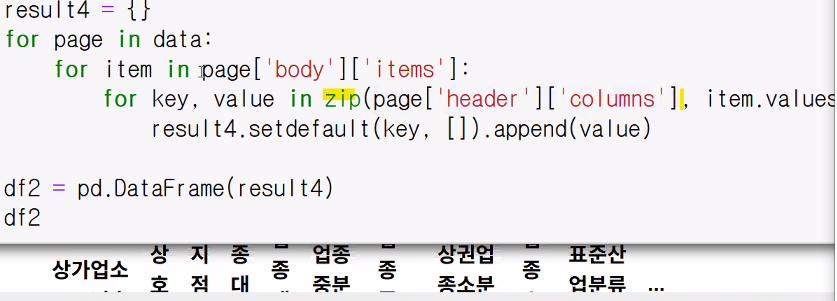

In [135]:
#가져오려는 값
c[0]['header']['columns'][:4] #너무길어서 4개만 보여주게함

['상가업소번호', '상호명', '지점명', '상권업종대분류코드']

key자리에 넣으려할때 길이 맞는지 재보기

In [136]:
len(c[0]['header']['columns'])

39

In [139]:
e2={}
for f in c:
    for d in f['body']['items']:
        for key, value in zip(f['header']['columns'], d.values()):
            e2.setdefault(key,[]).append(value)
df2=pd.DataFrame(e2)
df2


상가업소번호        상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
0      10027626   장모님치킨가창점  가창점         Q       음식       Q05   닭/오리요리   
1      10098244     짱구피자치킨              Q       음식       Q05   닭/오리요리   
2      10099459       쭈노치킨              Q       음식       Q05   닭/오리요리   
3      10136167       치킨뱅이              Q       음식       Q05   닭/오리요리   
4      10136346    치킨월드율량점  율량점         Q       음식       Q05   닭/오리요리   
...         ...        ...  ...       ...      ...       ...      ...   
36059   9829515       아리치킨              Q       음식       Q05   닭/오리요리   
36060   9851302       애니치킨              Q       음식       Q05   닭/오리요리   
36061   9867543      에디슨치킨              Q       음식       Q05   닭/오리요리   
36062   9918905  오븐에꾸운닭장유점  장유점         Q       음식       Q05   닭/오리요리   
36063   9967953       웰빙치킨              Q       음식       Q05   닭/오리요리   

      상권업종소분류코드   상권업종소분류명 표준산업분류코드  ...                     건물관리번호  \
0        Q05A08  후라이드/양념치킨   I56193  ...  2771031024101200004036858   
1        Q05A08  후라이드/양념치킨   I56193  ...  4125010300102680011008557   
2        Q05A08  후라이드/양념치킨   I56193  ...  4157025324105380008019970   
3        Q05A08  후라이드/양념치킨   I56193  ...  4213011000108300006022278   
4        Q05A08  후라이드/양념치킨   I56193  ...  4311111500108060000045239   
...         ...        ...      ...  ...                        ...   
36059    Q05A08  후라이드/양념치킨   I56193  ...  4125010200106740003008662   
36060    Q05A08  후라이드/양념치킨   I56193  ...  4785031036104090002008916   
36061    Q05A08  후라이드/양념치킨   I56193  ...  1135010600103590001010681   
36062    Q05A08  후라이드/양념치킨   I56193  ...  4825031027103150002091993   
36063    Q05A08  후라이드/양념치킨   I56193  ...  4213011100101360002016167   

              건물명                     도로명주소   구우편번호  신우편번호 동정보 층정보 호정보  \
0                      대구광역시 달성군 가창면 가창동로 6  711861  42938       1       
1                           경기도 동두천시 못골로 30  483030  11320               
2                    경기도 김포시 고촌읍 장차로13번길 18  415811  10126       1       
3                            강원도 원주시 금불3길 5  220938  26423       1       
4                  충청북도 청주시 청원구 공항로138번길 53  363818  28328       1       
...           ...                       ...     ...    ...  ..  ..  ..   
36059                      경기도 동두천시 거북마루로 6  483020  11348       1       
36060                  경상북도 칠곡군 지천면 신동로 147  718821  39864               
36061  중계5단지주공아파트         서울특별시 노원구 중계로 230  139781  01713       1       
36062       재영프라자           경상남도 김해시 삼문로 26  621280  51004       1       
36063                       강원도 원주시 상지대길 43  220954  26342       1       

               경도         위도  
0      128.644459  35.782663  
1      127.065903  37.901262  
2      126.769859  37.603752  
3      127.932025  37.348358  
4      127.487586  36.669816  
...           ...        ...  
36059  127.046713  37.895702  
36060  128.488717  35.956631  
36061  127.075031  37.651004  
36062  128.803565  35.192491  
36063  127.937290  37.369591  

[36064 rows x 39 columns]